In [1]:
# Import libraries
import pandas as pd
import requests
import gdown
import pyarrow
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import gc

In [2]:
# Load datasets
train_events = pd.read_csv('train_events.csv')

In [4]:
train_series_names = pd.read_parquet("train_series.parquet", columns=['series_id'])

series_id_list = train_series_names['series_id'].unique().tolist()

train_events = train_events.dropna()
events_series_id_list = train_events['series_id'].unique().tolist()

base_series = list(set(series_id_list) - set(events_series_id_list))

# list out the series:
len(base_series)

8

Only 8 series_ids are in the train series but not in the events series

Those are all night awake or all night asleep hahaha

In [5]:
def get_train_series_base(series):
    train = pd.read_parquet("train_series.parquet", filters=[('series_id','=',series)])
    train["awake"] = 2
    # just to make sure
    train["awake"] = train["awake"].astype("int")
    return(train)

###  anglez for series 390b487231ce

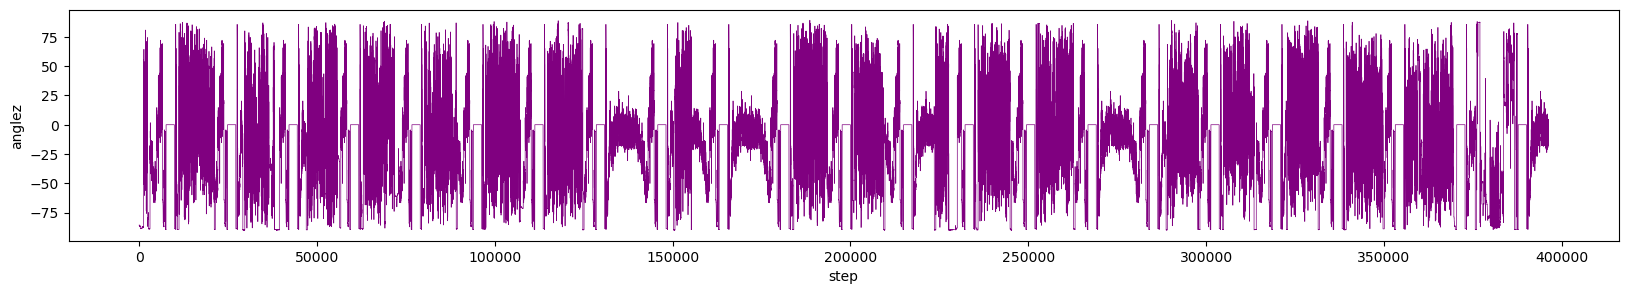

###  enmo for series 390b487231ce

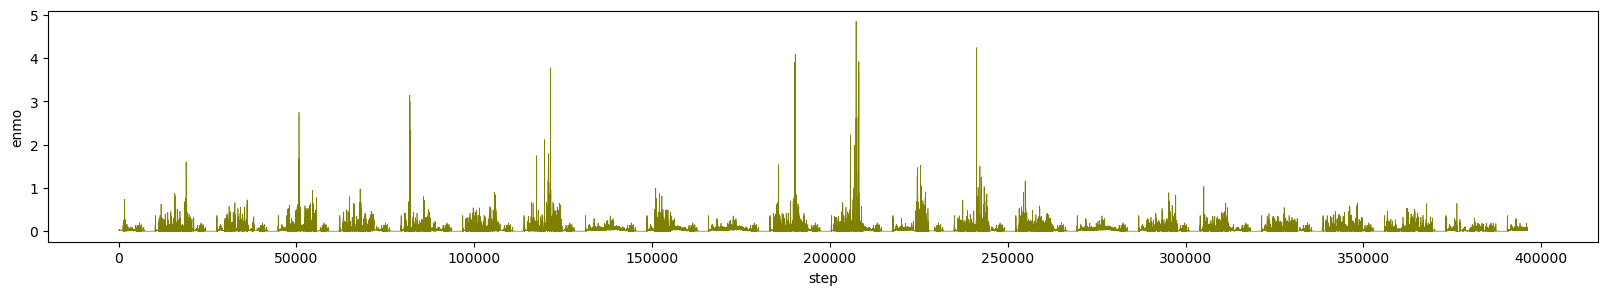

###  anglez for series c5d08fc3e040

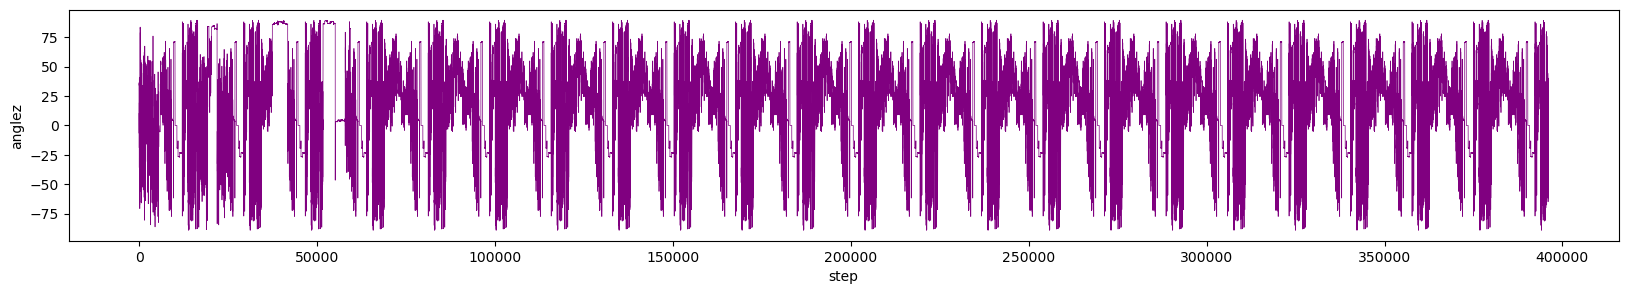

###  enmo for series c5d08fc3e040

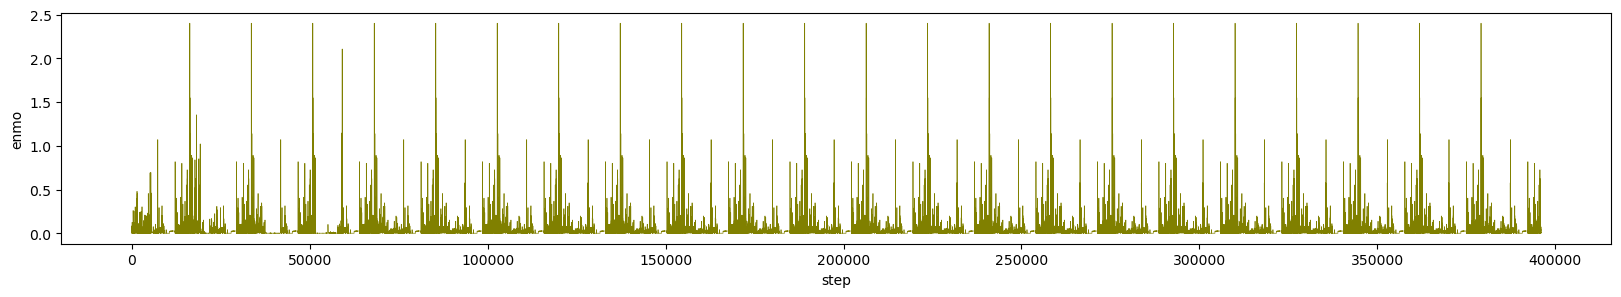

###  anglez for series a3e59c2ce3f6

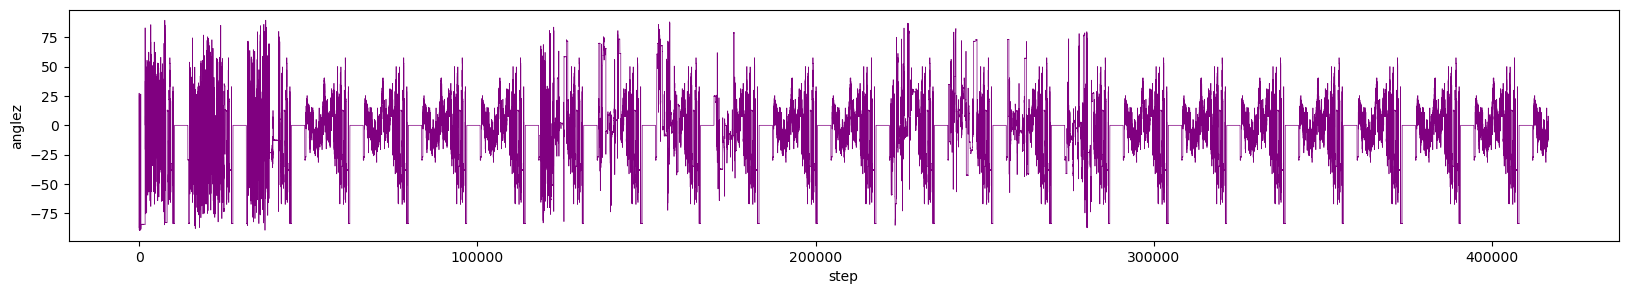

###  enmo for series a3e59c2ce3f6

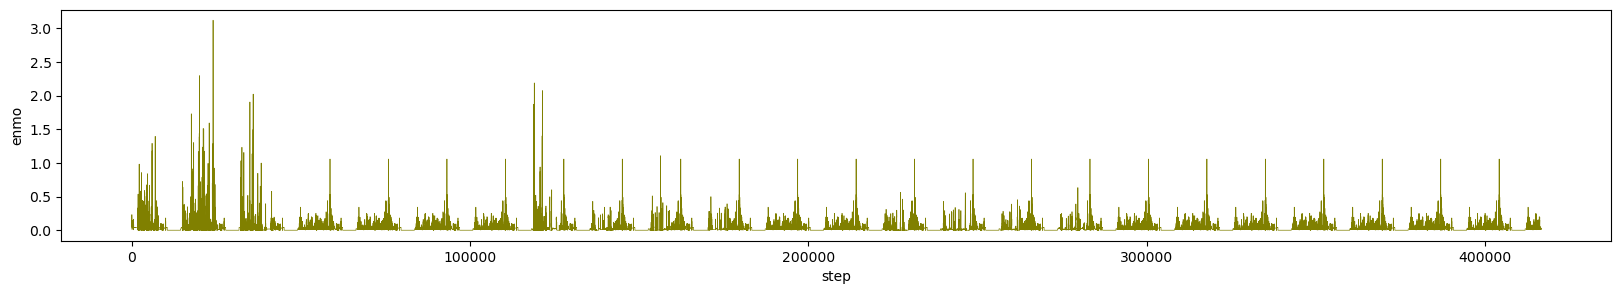

###  anglez for series e11b9d69f856

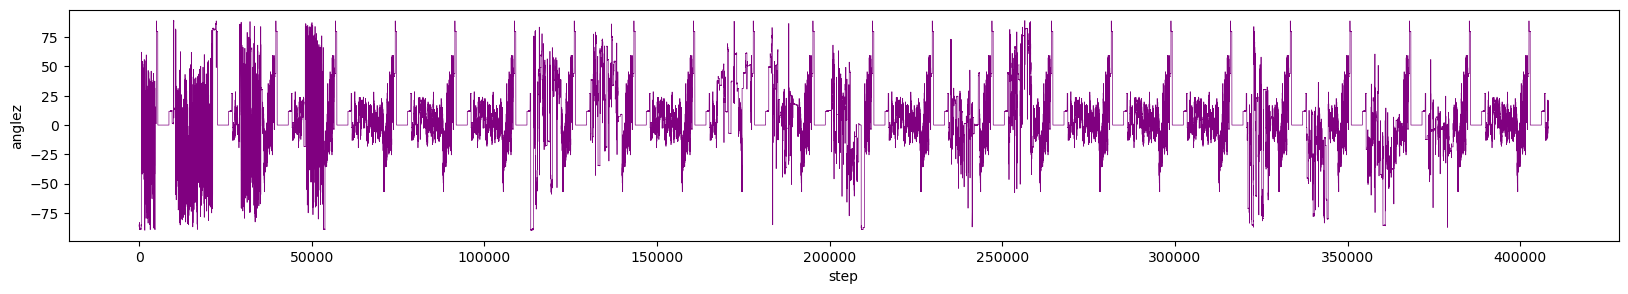

###  enmo for series e11b9d69f856

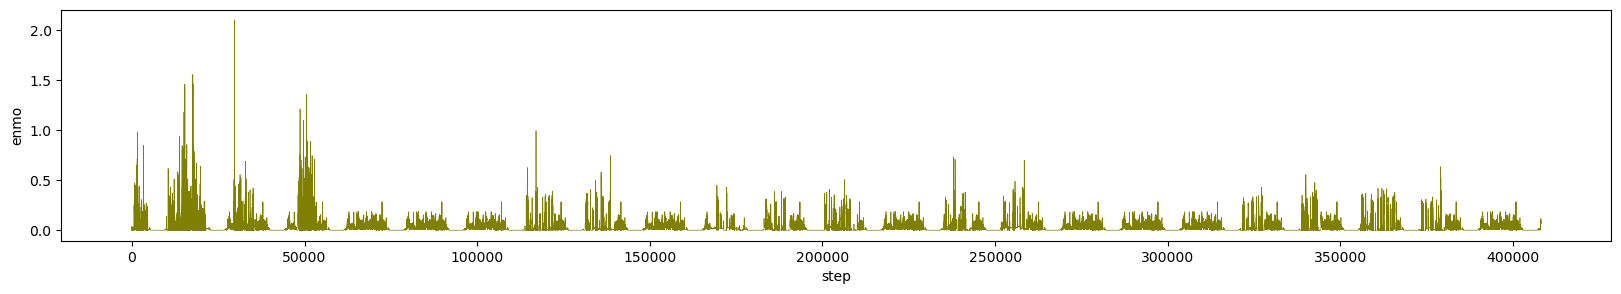

###  anglez for series c7b1283bb7eb

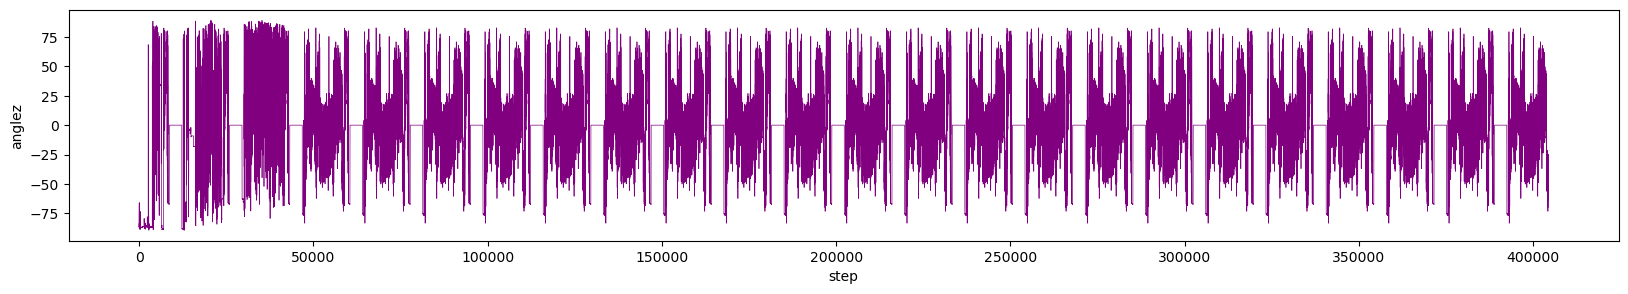

###  enmo for series c7b1283bb7eb

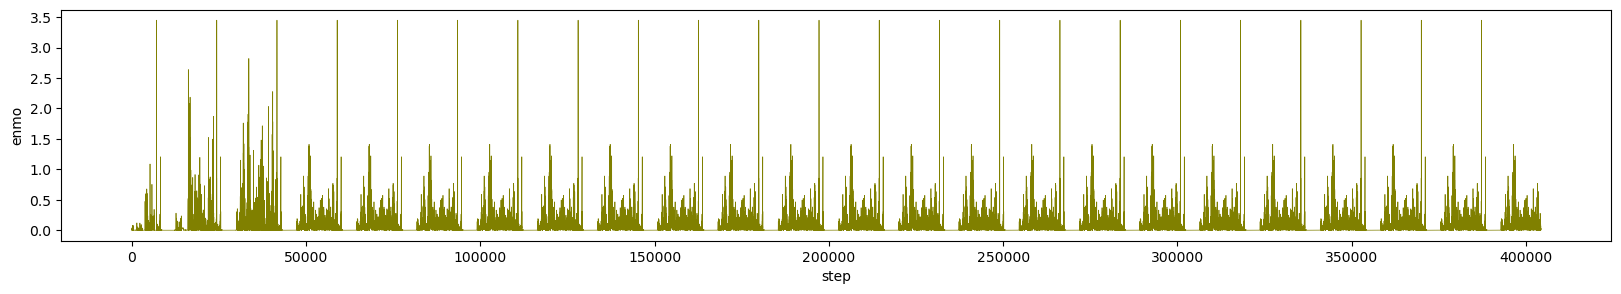

###  anglez for series 89c7daa72eee

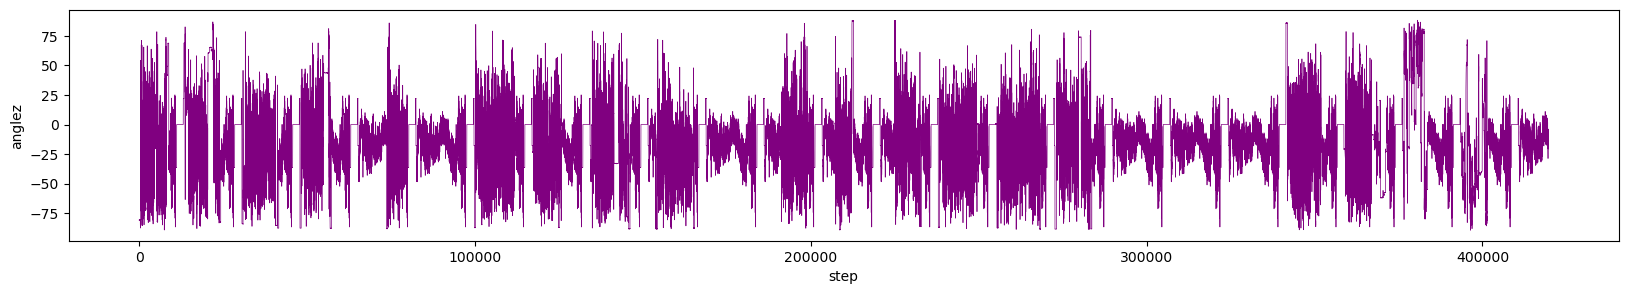

###  enmo for series 89c7daa72eee

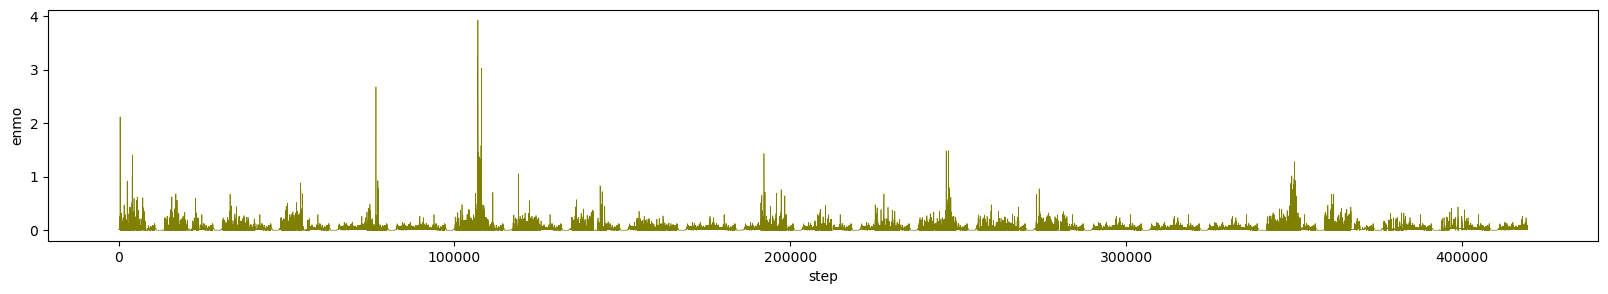

###  anglez for series 2fc653ca75c7

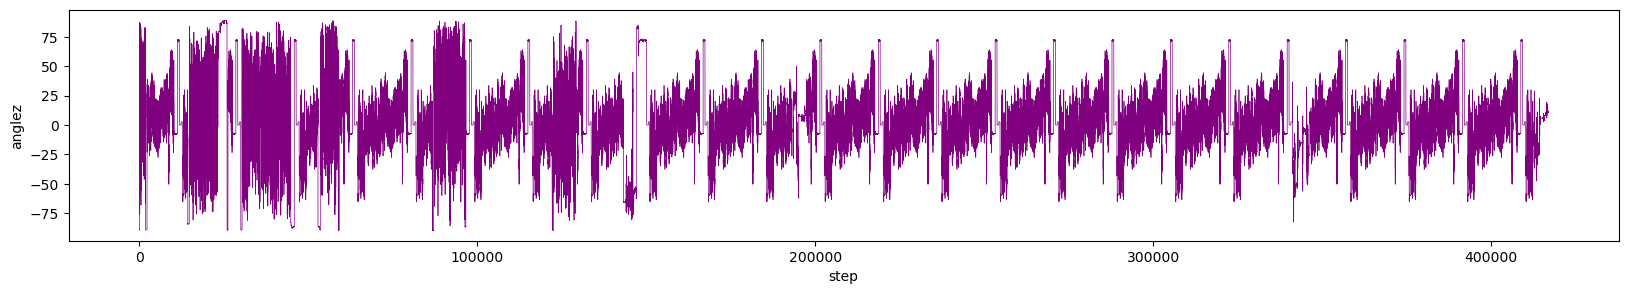

###  enmo for series 2fc653ca75c7

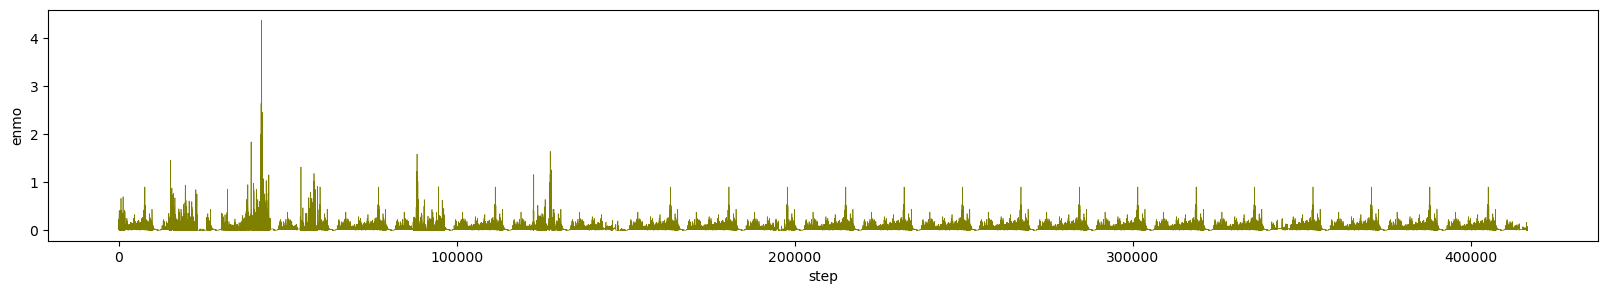

###  anglez for series 0f9e60a8e56d

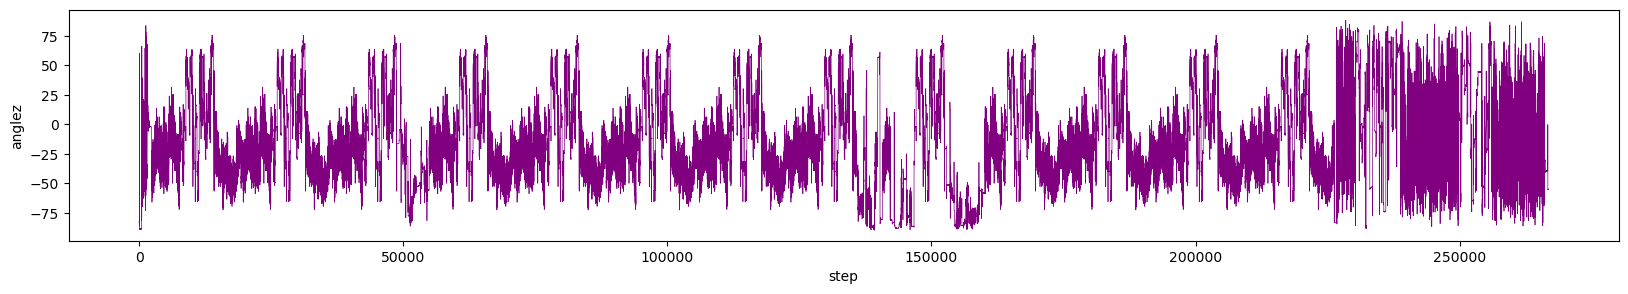

###  enmo for series 0f9e60a8e56d

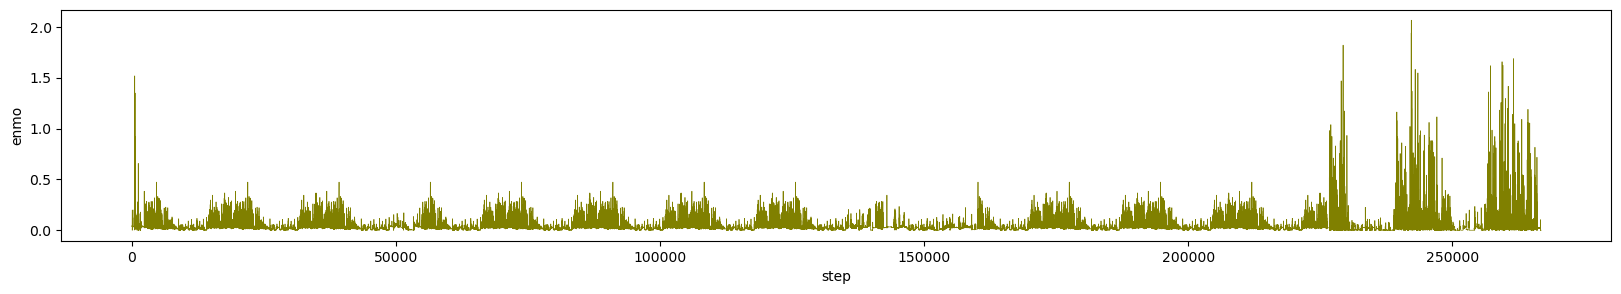

In [6]:
base_train_data = []

for series_id in base_series:
    train = get_train_series_base(series_id)
    base_train_data.append(train)
    
    # vizualize these series
    display(Markdown('###  anglez for series ' + series_id))
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.lineplot(data=train, x="step", y="anglez", color="purple", linewidth = 0.5)
    plt.show()
    display(Markdown('###  enmo for series ' + series_id))
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.lineplot(data=train, x="step", y="enmo", color="olive", linewidth = 0.5)
    plt.show()
    del train
    gc.collect()

In my view, the value of enmo and anglez in all awake or all asleep are more periodic than others (seen in the graph)